<a href="https://colab.research.google.com/github/shreytanwar/MNIST-CNN-and-KNN/blob/main/MNIST_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head

<bound method NDFrame.head of       7  0  0.1  0.2  0.3  0.4  ...  0.662  0.663  0.664  0.665  0.666  0.667
0     2  0    0    0    0    0  ...      0      0      0      0      0      0
1     1  0    0    0    0    0  ...      0      0      0      0      0      0
2     0  0    0    0    0    0  ...      0      0      0      0      0      0
3     4  0    0    0    0    0  ...      0      0      0      0      0      0
4     1  0    0    0    0    0  ...      0      0      0      0      0      0
...  .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
9994  2  0    0    0    0    0  ...      0      0      0      0      0      0
9995  3  0    0    0    0    0  ...      0      0      0      0      0      0
9996  4  0    0    0    0    0  ...      0      0      0      0      0      0
9997  5  0    0    0    0    0  ...      0      0      0      0      0      0
9998  6  0    0    0    0    0  ...      0      0      0      0      0      0

[9999 rows x 785 columns]>

In [4]:
Y = df.iloc[:,0].values
X = df.iloc[:,1:].values

split = (int)(0.8 * X.shape[0])

X_train = X[:split, :]
Y_train = Y[:split]

X_test = X[split:, :]
Y_test = Y[split:]

In [5]:
Y

array([2, 1, 0, ..., 4, 5, 6])

KNN

In [6]:
def distance(x, point):
  d = np.sqrt( sum( (x-point) ** 2 ))
  return d

In [7]:
def knn(X, Y, point, K = 5):
  dist = []
  m = X.shape[0]

  for i in range(m):
    d = distance(X[i], point)
    dist.append((d,Y[i]))

  dist = sorted(dist, key = lambda d : d[0])
  dist = np.array(dist[ : K])

  classes = np.unique(np.array(Y))

  print(classes)

  votes = np.zeros(len(classes))

  for d in dist:
    votes[int(d[1])] += 1/d[0]

  pred = np.argmax(votes)

  return pred

In [8]:
def drawImg(sample):
  sample = sample.reshape(28,28)
  plt.imshow(sample)
  plt.show()

In [9]:
y_pred = []

for test in X_test[:10, :]:
  y_pred.append( knn(X_train, Y_train, test, K = 5) )

count = 0

for i in range(len(y_pred)):
  if y_pred[i] == Y_test[i]:
    count+=1

accuracy = count/len(y_pred)

print("Accuracy: {accuracy*100}")

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
Accuracy: {accuracy*100}


In [11]:
def predict(i):
  y_pred = knn(X_train, Y_train, X_test[i], K = 5)
  print(y_pred)
  drawImg(X_test[i])

[0 1 2 3 4 5 6 7 8 9]
3


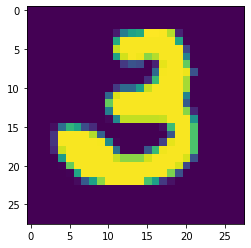

[0 1 2 3 4 5 6 7 8 9]
4


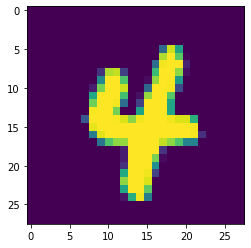

[0 1 2 3 4 5 6 7 8 9]
7


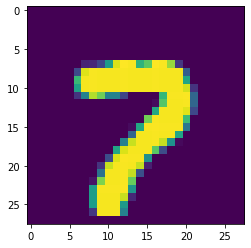

[0 1 2 3 4 5 6 7 8 9]
9


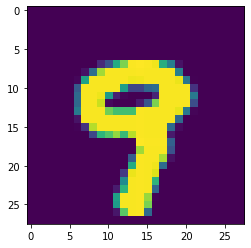

[0 1 2 3 4 5 6 7 8 9]
4


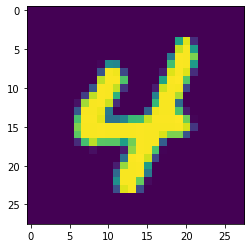

In [13]:
for i in range (0,5):
  predict(50+i)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


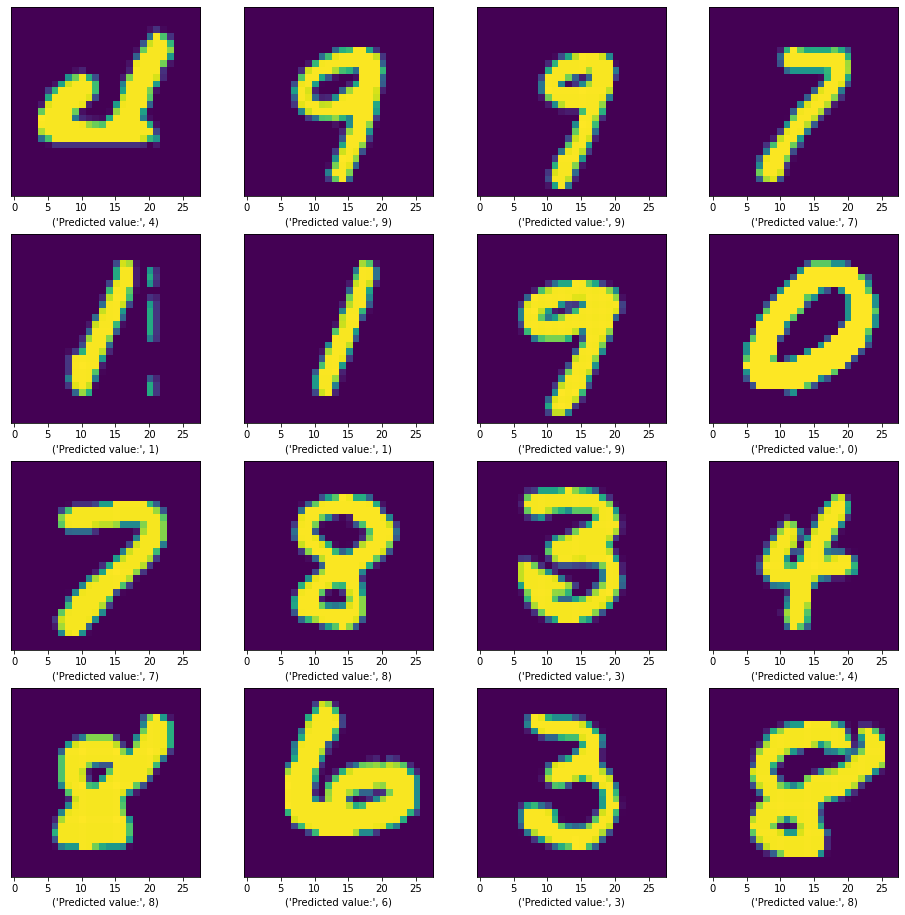

In [18]:
fig = plt.figure(figsize=(16,16))
index = 1
for i in range(0,16):
  y_pred = knn(X_train, Y_train, X_test[i], K = 5)
  img = X_test[i]
  img = img.reshape(28,28)
  ax = fig.add_subplot(4,4,index)
  index=index+1
  plt.imshow(img)
  label = "Predicted value:",y_pred
  ax.get_yaxis().set_visible(False)
  ax.set_xlabel(label)